## Project One - Titanic Survival Prediction


In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report


tdf = pd.read_csv("titanic_train.csv")

X,Y = tdf.loc[:, tdf.columns != 'Survived'], tdf['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)


df = pd.concat([X_train,y_train], axis=1)
df_test = X_test

df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
686,687,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
788,789,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S
466,467,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
321,322,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,NaN,S
358,359,3,"McGovern, Miss. Mary",female,NaN,0,0,330931,7.8792,NaN,Q


In [3]:
df.shape

(623, 12)

dataset has 891 rows ans 12 columns

In [4]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,623.000000,623.000000,508.000000,623.000000,623.000000,623.000000,623.000000
mean,450.982343,2.348315,29.934862,0.504013,0.375602,30.470980,0.372392
std,260.625246,0.817234,14.159171,1.071210,0.819879,47.692473,0.483830
min,1.000000,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000
25%,229.500000,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,453.000000,3.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,678.500000,3.000000,39.000000,1.000000,0.000000,29.850000,1.000000
max,891.000000,3.000000,74.000000,8.000000,6.000000,512.329200,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 268 to 128
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Pclass       623 non-null    int64  
 2   Name         623 non-null    object 
 3   Sex          623 non-null    object 
 4   Age          508 non-null    float64
 5   SibSp        623 non-null    int64  
 6   Parch        623 non-null    int64  
 7   Ticket       623 non-null    object 
 8   Fare         623 non-null    float64
 9   Cabin        127 non-null    object 
 10  Embarked     623 non-null    object 
 11  Survived     623 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 63.3+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            115
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          496
Embarked         0
Survived         0
dtype: int64

In [7]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,623,623,623,127,623
unique,623,2,511,102,3
top,"Matthews, Mr. William John",male,1601,E101,S
freq,1,405,7,3,454


In [8]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            115
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          496
Embarked         0
Survived         0
dtype: int64

In [9]:
survived = df[df['Survived']==1]
not_survived = df[df['Survived']==0]
print("Survived = %i(%.1f%%)" %(len(not_survived), float(len(survived))/len(df)*100))
print("Not Survived = %i(%.1f%%)" %(len(not_survived), float(len(not_survived))/len(df)*100))
print("Total: %i"%len(df))

Survived = 391(37.2%)
Not Survived = 391(62.8%)
Total: 623


In [10]:
df.Pclass.value_counts()

3    354
1    137
2    132
Name: Pclass, dtype: int64

In [11]:
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1            85
        0            52
2       1            67
        0            65
3       0           274
        1            80
Name: Survived, dtype: int64

In [12]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.620438
1,2,0.507576
2,3,0.225989


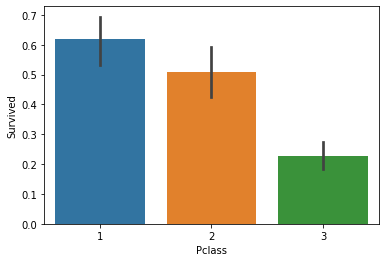

In [13]:
sns.barplot(x='Pclass', y='Survived', data=df)

Pclass 1 have better survival chance

In [14]:
df.Sex.value_counts()

male      405
female    218
Name: Sex, dtype: int64

There are More males onboard

In [15]:
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           160
        0            58
male    0           333
        1            72
Name: Survived, dtype: int64

In [16]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean()

,SibSp,Survived
0,0,0.338028
1,1,0.510067
2,2,0.421053
3,3,0.250000
4,4,0.111111
5,5,0.000000
6,8,0.000000


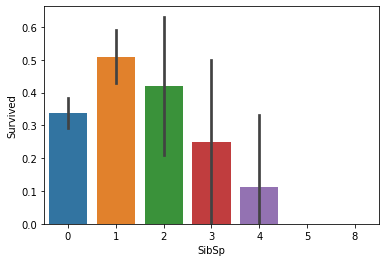

In [17]:
sns.barplot(x='SibSp', y='Survived', data=df)

Sex     female  male
Pclass              
1           60    77
2           58    74
3          100   254


Text(0, 0.5, 'Percentage')

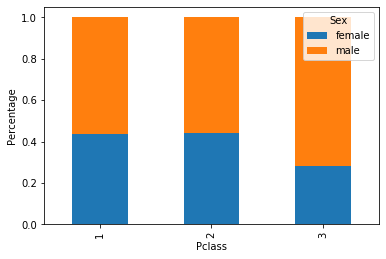

In [18]:
tab = pd.crosstab(df['Pclass'], df['Sex'])
print(tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

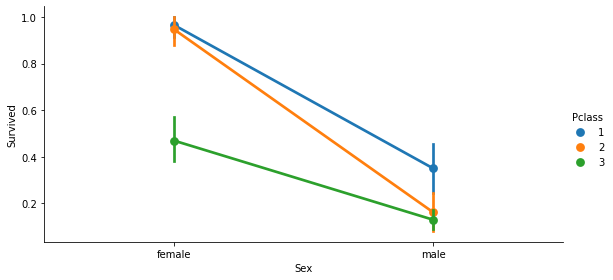

In [19]:
sns.factorplot('Sex','Survived', hue='Pclass', size=4, aspect=2, data=df)

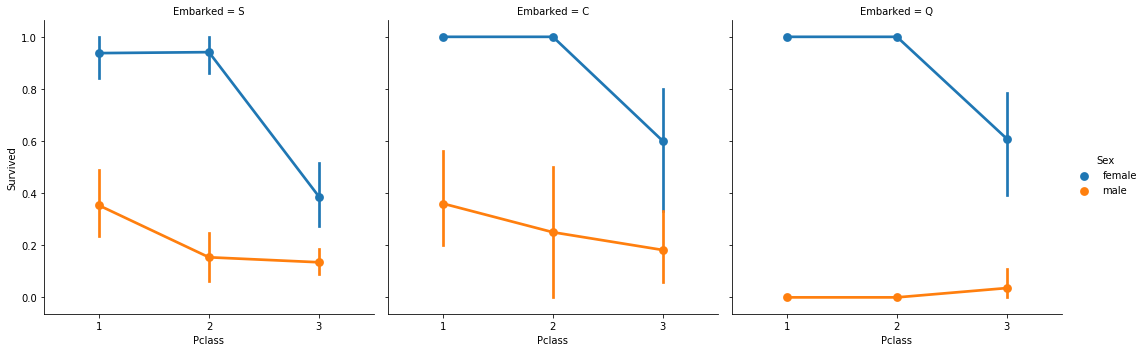

In [20]:
sns.factorplot('Pclass','Survived', hue='Sex',col='Embarked', size=5, aspect=1, data=df)

In [21]:
df.Parch.value_counts()

0    477
1     83
2     53
5      5
4      2
3      2
6      1
Name: Parch, dtype: int64

In [22]:
df.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           318
       1           159
1      1            46
       0            37
2      0            28
       1            25
3      0             1
       1             1
4      0             2
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [23]:
df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean()

,Parch,Survived
0,0,0.333333
1,1,0.554217
2,2,0.471698
3,3,0.500000
4,4,0.000000
5,5,0.200000
6,6,0.000000


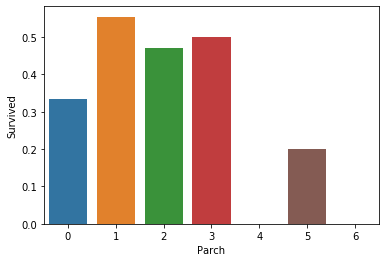

In [24]:
sns.barplot(x='Parch', y='Survived', data=df, ci = None)

In [25]:
df.Age.value_counts()

21.00    20
28.00    20
22.00    19
30.00    19
18.00    19
         ..
34.50     1
55.50     1
0.75      1
53.00     1
45.50     1
Name: Age, Length: 80, dtype: int64

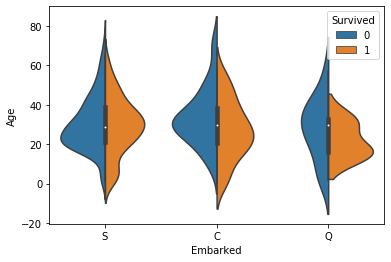

In [26]:
sns.violinplot(x='Embarked', y='Age', hue='Survived', data=df, split=True)

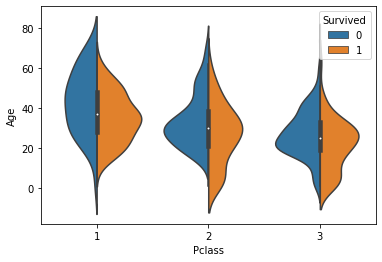

In [27]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)

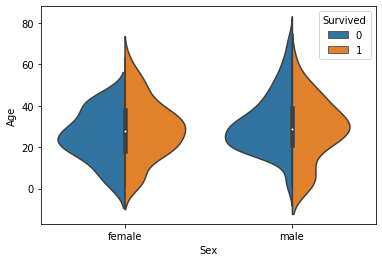

In [28]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)

In [29]:
total_survived = df[df['Survived']==1]
total_not_survived = df[df['Survived']==0]

In [30]:
Male_survived = df[(df['Survived']==1) & (df['Sex']=='male')]
Female_survived = df[(df['Survived']==1) & (df['Sex']=='female')]

In [31]:
Male_not_survived = df[(df['Survived']==0) & (df['Sex']=='male')]
Female_not_survived = df[(df['Survived']==0) & (df['Sex']=='female')]

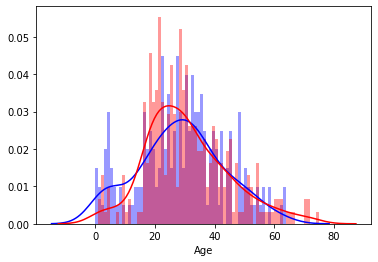

In [32]:
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red' , axlabel='Age')


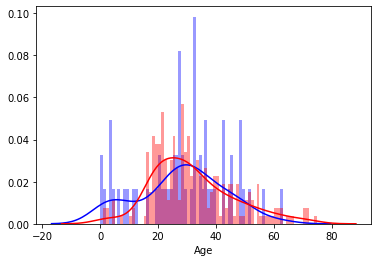

In [33]:
sns.distplot(Male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(Male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red' , axlabel='Age')


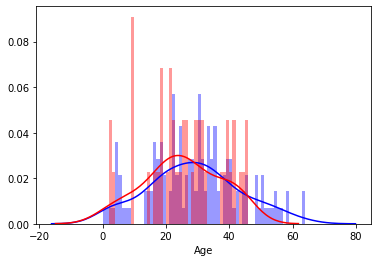

In [34]:
sns.distplot(Female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(Female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red' , axlabel='Age')


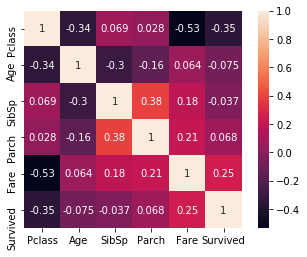

In [35]:
sns.heatmap(df.drop('PassengerId',axis=1).corr(), square=True, annot=True)

In [36]:
train_testdf = [df, df_test]
for dataset in train_testdf:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')

In [37]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
268,269,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S,1,Mrs
392,393,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S,0,Mr
197,198,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S,0,Mr
64,65,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,0,Mr
239,240,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S,0,Mr


In [38]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,4
Jonkheer,0,1
Lady,1,0
Major,0,1
Master,0,25


In [39]:
for dataset in train_testdf:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
df[['Title','Survived']].groupby(['Title'], as_index=False).mean()   

,Title,Survived
0,Master,0.560000
1,Miss,0.708661
2,Mr,0.150685
3,Mrs,0.761364
4,Other,0.333333


In [40]:
title_map = {'Mr':1, 'Miss':2, 'Master':3, 'Mrs':4, 'Other':5}
for dataset in train_testdf:
    dataset['Title'] = dataset['Title'].map(title_map)
    dataset['Title'] = dataset['Title'].fillna(0)

In [41]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
268,269,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S,1,4
392,393,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S,0,1
197,198,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S,0,1
64,65,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,0,1
239,240,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S,0,1


In [42]:
for dataset in train_testdf:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)

In [43]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
268,269,1,"Graham, Mrs. William Thompson (Edith Junkins)",1,58.0,0,1,PC 17582,153.4625,C125,S,1,4
392,393,3,"Gustafsson, Mr. Johan Birger",0,28.0,2,0,3101277,7.9250,NaN,S,0,1
197,198,3,"Olsen, Mr. Karl Siegwart Andreas",0,42.0,0,1,4579,8.4042,NaN,S,0,1
64,65,1,"Stewart, Mr. Albert A",0,NaN,0,0,PC 17605,27.7208,NaN,C,0,1
239,240,2,"Hunt, Mr. George Henry",0,33.0,0,0,SCO/W 1585,12.2750,NaN,S,0,1


In [44]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [45]:
df.Embarked.value_counts()

S    454
C    113
Q     56
Name: Embarked, dtype: int64

In [46]:
for dataset in train_testdf:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [47]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
268,269,1,"Graham, Mrs. William Thompson (Edith Junkins)",1,58.0,0,1,PC 17582,153.4625,C125,S,1,4
392,393,3,"Gustafsson, Mr. Johan Birger",0,28.0,2,0,3101277,7.9250,NaN,S,0,1
197,198,3,"Olsen, Mr. Karl Siegwart Andreas",0,42.0,0,1,4579,8.4042,NaN,S,0,1
64,65,1,"Stewart, Mr. Albert A",0,NaN,0,0,PC 17605,27.7208,NaN,C,0,1
239,240,2,"Hunt, Mr. George Henry",0,33.0,0,0,SCO/W 1585,12.2750,NaN,S,0,1


In [48]:
for dataset in train_testdf:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0 , 'C':1 , 'Q':2 }).astype(int)

In [49]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
268,269,1,"Graham, Mrs. William Thompson (Edith Junkins)",1,58.0,0,1,PC 17582,153.4625,C125,0,1,4
392,393,3,"Gustafsson, Mr. Johan Birger",0,28.0,2,0,3101277,7.9250,NaN,0,0,1
197,198,3,"Olsen, Mr. Karl Siegwart Andreas",0,42.0,0,1,4579,8.4042,NaN,0,0,1
64,65,1,"Stewart, Mr. Albert A",0,NaN,0,0,PC 17605,27.7208,NaN,1,0,1
239,240,2,"Hunt, Mr. George Henry",0,33.0,0,0,SCO/W 1585,12.2750,NaN,0,0,1


In [50]:
for dataset in train_testdf:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std , age_avg + age_std, size = age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    
    dataset['Age'] = dataset['Age'].astype(int)

df['AgeRange'] = pd.cut(df['Age'], 5)
print(df[['AgeRange','Survived']].groupby(['AgeRange'], as_index = False).mean())

         AgeRange  Survived
0  (-0.074, 14.8]  0.620000
1    (14.8, 29.6]  0.323529
2    (29.6, 44.4]  0.373874
3    (44.4, 59.2]  0.435484
4    (59.2, 74.0]  0.176471


In [51]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,AgeRange
268,269,1,"Graham, Mrs. William Thompson (Edith Junkins)",1,58,0,1,PC 17582,153.4625,C125,0,1,4,"(44.4, 59.2]"
392,393,3,"Gustafsson, Mr. Johan Birger",0,28,2,0,3101277,7.9250,NaN,0,0,1,"(14.8, 29.6]"
197,198,3,"Olsen, Mr. Karl Siegwart Andreas",0,42,0,1,4579,8.4042,NaN,0,0,1,"(29.6, 44.4]"
64,65,1,"Stewart, Mr. Albert A",0,28,0,0,PC 17605,27.7208,NaN,1,0,1,"(14.8, 29.6]"
239,240,2,"Hunt, Mr. George Henry",0,33,0,0,SCO/W 1585,12.2750,NaN,0,0,1,"(29.6, 44.4]"


In [52]:
for dataset in train_testdf:
    dataset.loc[ dataset['Age']<=16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

In [53]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,AgeRange
268,269,1,"Graham, Mrs. William Thompson (Edith Junkins)",1,3,0,1,PC 17582,153.4625,C125,0,1,4,"(44.4, 59.2]"
392,393,3,"Gustafsson, Mr. Johan Birger",0,1,2,0,3101277,7.9250,NaN,0,0,1,"(14.8, 29.6]"
197,198,3,"Olsen, Mr. Karl Siegwart Andreas",0,2,0,1,4579,8.4042,NaN,0,0,1,"(29.6, 44.4]"
64,65,1,"Stewart, Mr. Albert A",0,1,0,0,PC 17605,27.7208,NaN,1,0,1,"(14.8, 29.6]"
239,240,2,"Hunt, Mr. George Henry",0,2,0,0,SCO/W 1585,12.2750,NaN,0,0,1,"(29.6, 44.4]"


In [54]:
for dataset in train_testdf:
    dataset['Fare'] = dataset['Fare'].fillna(df['Fare'].median())

In [55]:
df['FareRange'] = pd.qcut(df['Fare'],4)
print(df[['FareRange','Survived']].groupby(['FareRange'], as_index = False).mean())

          FareRange  Survived
0   (-0.001, 7.925]  0.200000
1   (7.925, 14.454]  0.286667
2   (14.454, 29.85]  0.427632
3  (29.85, 512.329]  0.583333


In [56]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,AgeRange,FareRange
268,269,1,"Graham, Mrs. William Thompson (Edith Junkins)",1,3,0,1,PC 17582,153.4625,C125,0,1,4,"(44.4, 59.2]","(29.85, 512.329]"
392,393,3,"Gustafsson, Mr. Johan Birger",0,1,2,0,3101277,7.9250,NaN,0,0,1,"(14.8, 29.6]","(-0.001, 7.925]"
197,198,3,"Olsen, Mr. Karl Siegwart Andreas",0,2,0,1,4579,8.4042,NaN,0,0,1,"(29.6, 44.4]","(7.925, 14.454]"
64,65,1,"Stewart, Mr. Albert A",0,1,0,0,PC 17605,27.7208,NaN,1,0,1,"(14.8, 29.6]","(14.454, 29.85]"
239,240,2,"Hunt, Mr. George Henry",0,2,0,0,SCO/W 1585,12.2750,NaN,0,0,1,"(29.6, 44.4]","(7.925, 14.454]"


In [57]:
for dataset in train_testdf:
    dataset.loc[dataset['Fare']<= 7.925, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.925) & (dataset['Fare']<=14.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.5) & (dataset['Fare']<=31.275), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31.275, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [58]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,AgeRange,FareRange
268,269,1,"Graham, Mrs. William Thompson (Edith Junkins)",1,3,0,1,PC 17582,3,C125,0,1,4,"(44.4, 59.2]","(29.85, 512.329]"
392,393,3,"Gustafsson, Mr. Johan Birger",0,1,2,0,3101277,0,NaN,0,0,1,"(14.8, 29.6]","(-0.001, 7.925]"
197,198,3,"Olsen, Mr. Karl Siegwart Andreas",0,2,0,1,4579,1,NaN,0,0,1,"(29.6, 44.4]","(7.925, 14.454]"
64,65,1,"Stewart, Mr. Albert A",0,1,0,0,PC 17605,2,NaN,1,0,1,"(14.8, 29.6]","(14.454, 29.85]"
239,240,2,"Hunt, Mr. George Henry",0,2,0,0,SCO/W 1585,1,NaN,0,0,1,"(29.6, 44.4]","(7.925, 14.454]"


In [59]:
for dataset in train_testdf:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print(df[['FamilySize','Survived']].groupby(['FamilySize'], as_index= False).mean())

   FamilySize  Survived
0           1  0.295213
1           2  0.543103
2           3  0.549296
3           4  0.684211
4           5  0.272727
5           6  0.066667
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [60]:
for dataset in train_testdf:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] ==1 , 'IsAlone'] =1
print(df[['IsAlone','Survived']].groupby(['IsAlone'], as_index = False).mean())

   IsAlone  Survived
0        0  0.489879
1        1  0.295213


In [61]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
686,687,3,"Panula, Mr. Jaako Arnold",0,0,4,1,3101295,3,NaN,0,1,6,0
788,789,3,"Dean, Master. Bertram Vere",0,0,1,2,C.A. 2315,2,NaN,0,3,4,0
466,467,2,"Campbell, Mr. William",0,1,0,0,239853,0,NaN,0,1,1,1
321,322,3,"Danoff, Mr. Yoto",0,1,0,0,349219,0,NaN,0,1,1,1
358,359,3,"McGovern, Miss. Mary",1,1,0,0,330931,0,NaN,2,2,1,1


In [62]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,AgeRange,FareRange,FamilySize,IsAlone
268,269,1,"Graham, Mrs. William Thompson (Edith Junkins)",1,3,0,1,PC 17582,3,C125,0,1,4,"(44.4, 59.2]","(29.85, 512.329]",2,0
392,393,3,"Gustafsson, Mr. Johan Birger",0,1,2,0,3101277,0,NaN,0,0,1,"(14.8, 29.6]","(-0.001, 7.925]",3,0
197,198,3,"Olsen, Mr. Karl Siegwart Andreas",0,2,0,1,4579,1,NaN,0,0,1,"(29.6, 44.4]","(7.925, 14.454]",2,0
64,65,1,"Stewart, Mr. Albert A",0,1,0,0,PC 17605,2,NaN,1,0,1,"(14.8, 29.6]","(14.454, 29.85]",1,1
239,240,2,"Hunt, Mr. George Henry",0,2,0,0,SCO/W 1585,1,NaN,0,0,1,"(29.6, 44.4]","(7.925, 14.454]",1,1


In [63]:
X_train.shape, y_train.shape, X_test.shape

((623, 11), (623,), (268, 14))

In [64]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
268,269,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
392,393,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S
197,198,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
64,65,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
239,240,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
285,286,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C
852,853,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
778,779,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
124,125,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S


In [65]:
y_train

268    1
392    0
197    0
64     0
239    0
      ..
285    0
852    0
778    0
124    0
128    1
Name: Survived, Length: 623, dtype: int64

In [66]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
686,687,3,"Panula, Mr. Jaako Arnold",0,0,4,1,3101295,3,NaN,0,1,6,0
788,789,3,"Dean, Master. Bertram Vere",0,0,1,2,C.A. 2315,2,NaN,0,3,4,0
466,467,2,"Campbell, Mr. William",0,1,0,0,239853,0,NaN,0,1,1,1
321,322,3,"Danoff, Mr. Yoto",0,1,0,0,349219,0,NaN,0,1,1,1
358,359,3,"McGovern, Miss. Mary",1,1,0,0,330931,0,NaN,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,747,3,"Abbott, Mr. Rossmore Edward",0,0,1,1,C.A. 2673,2,NaN,0,1,3,0
135,136,2,"Richard, Mr. Emile",0,1,0,0,SC/PARIS 2133,2,NaN,1,1,1,1
177,178,1,"Isham, Miss. Ann Elizabeth",1,3,0,0,PC 17595,2,C49,1,2,1,1
437,438,2,"Richards, Mrs. Sidney (Emily Hocking)",1,1,2,3,29106,2,NaN,0,4,6,0


In [67]:
features_drop = ['Name','SibSp','Parch','Ticket','Cabin', 'FamilySize']
df = df.drop(features_drop, axis=1)
df_test = df_test.drop(features_drop, axis=1)
df = df.drop(['PassengerId','AgeRange','FareRange'], axis=1)

In [68]:
df.head(1)

,Pclass,Sex,Age,Fare,Embarked,Survived,Title,IsAlone
268,1,1,3,3,0,1,4,0


In [69]:
df_test.head(1)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
686,687,3,0,0,3,0,1,0


In [70]:
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,Title,IsAlone
268,1,1,3,3,0,1,4,0
392,3,0,1,0,0,0,1,0
197,3,0,2,1,0,0,1,0
64,1,0,1,2,1,0,1,1
239,2,0,2,1,0,0,1,1


In [71]:
X_train = df.drop('Survived', axis=1)
y_train = df['Survived']
X_test = df_test.drop("PassengerId", axis=1).copy()
X_train

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
268,1,1,3,3,0,4,0
392,3,0,1,0,0,1,0
197,3,0,2,1,0,1,0
64,1,0,1,2,1,1,1
239,2,0,2,1,0,1,1
...,...,...,...,...,...,...,...
285,3,0,2,1,1,1,1
852,3,1,0,2,1,2,0
778,3,0,2,0,2,1,1
124,1,0,3,3,0,1,0


In [72]:
y_train

268    1
392    0
197    0
64     0
239    0
      ..
285    0
852    0
778    0
124    0
128    1
Name: Survived, Length: 623, dtype: int64

In [73]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
686,3,0,0,3,0,1,0
788,3,0,0,2,0,3,0
466,2,0,1,0,0,1,1
321,3,0,1,0,0,1,1
358,3,1,1,0,2,2,1
...,...,...,...,...,...,...,...
746,3,0,0,2,0,1,0
135,2,0,1,2,1,1,1
177,1,1,3,2,1,2,1
437,2,1,1,2,0,4,0


In [74]:
X_train.shape, y_train.shape, X_test.shape

((623, 7), (623,), (268, 7))

### Training Models and Comparing Best Accuracy

In [75]:
lgc = LogisticRegression()
lgc.fit(X_train , y_train)
y_predict_logistic_reg = lgc.predict(X_test)
acc_log_reg = round( lgc.score(X_train, y_train) * 100, 2)
print(acc_log_reg)

78.01


##### Logistic Regression gives accuracy of 80.1%

In [76]:
lgc = SVC()
lgc.fit(X_train, y_train)
y_predict_svc = lgc.predict(X_test)
acc_svc = round(lgc.score(X_train, y_train) * 100, 2)
print(acc_svc)

83.63


##### Logistic Regression gives accuracy of 80.1

In [77]:
lgc = LinearSVC()
lgc.fit(X_train, y_train)
y_predict_linearsvc = lgc.predict(X_test)
acc_linearsvc = round(lgc.score(X_train, y_train) * 100, 2)
print(acc_linearsvc)

79.13


##### Linear Support Vector Machine gives accuracy of 79.45

In [78]:
lgc = KNeighborsClassifier(n_neighbors = 1)
lgc.fit(X_train, y_train)
y_predict_knn = lgc.predict(X_test)
acc_knn = round(lgc.score(X_train, y_train) * 100, 2)
print(acc_knn)

79.94


##### KNeighborsClassifier with n_neighbors = 1 gives accuracy of 86.04

In [79]:
lgc = DecisionTreeClassifier()
lgc.fit(X_train, y_train)
y_predict_dtc = lgc.predict(X_test)
acc_dtc = round(lgc.score(X_train, y_train) * 100, 2)
print(acc_dtc)

88.44


##### DecisionTreeClassifier gives accuracy of 89.09

In [80]:
lgc = RandomForestClassifier()
lgc.fit(X_train, y_train)
y_predict_rf = lgc.predict(X_test)
acc_rf = round(lgc.score(X_train, y_train) * 100)
print(acc_rf)

88.0


##### Random Forest Classifier gives 89% Accuracy.

In [81]:
lgc = GaussianNB()
lgc.fit(X_train, y_train)
y_pred_gnb = lgc.predict(X_test)
acc_gnb = round(lgc.score(X_train, y_train) * 100, 2)
print (acc_gnb)

76.24


##### GaussianNB gives 76.24%

In [82]:
lgc = SGDClassifier(max_iter=5, tol=None)
lgc.fit(X_train, y_train)
y_pred_sgd = lgc.predict(X_test)
acc_sgd = round(lgc.score(X_train, y_train) * 100, 2)
print (acc_sgd)

80.58


##### SGD classifier gives 76.4% accuracy

### Score Comparison of above models

In [83]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linearsvc, 
              acc_knn,  acc_dtc, acc_rf, acc_gnb, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,88.44
5,Random Forest,88.00
1,Support Vector Machines,83.63
7,Stochastic Gradient Decent,80.58
3,KNN,79.94
2,Linear SVC,79.13
0,Logistic Regression,78.01
6,Naive Bayes,76.24


From the above table, we can see that Decision Tree and Random Forest classfiers have the highest accuracy score.

Among these two, we choose Random Forest classifier as it has the ability to limit overfitting as compared to Decision Tree classifier.

### Confusion Matrix For Training And Testing Data

In [84]:
lgc = RandomForestClassifier()
lgc.fit(X_train, y_train)
y_predict_rf = lgc.predict(X_test)
acc_rf = round(lgc.score(X_train, y_train) * 100)
print(acc_rf)

88.0


Train results: confusion matrix
[[365  26]
 [ 46 186]]


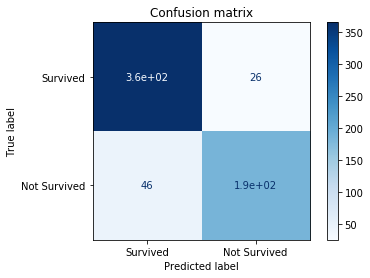

In [85]:
from sklearn.metrics import plot_confusion_matrix


disp = plot_confusion_matrix(lgc, X_train, y_train,
                             display_labels=['Survived','Not Survived'],
                             cmap=plt.cm.Blues,
                             )
disp.ax_.set_title('Confusion matrix')

print('Train results: confusion matrix')
print(disp.confusion_matrix)

TEST results: confusion matrix
[[139  19]
 [ 36  74]]


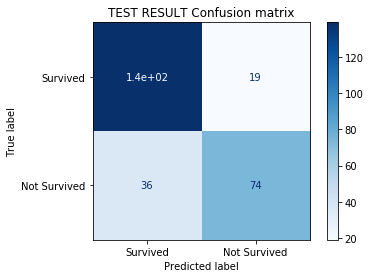

In [86]:
disp = plot_confusion_matrix(lgc, X_test, y_test,
                             display_labels=['Survived','Not Survived'],
                             cmap=plt.cm.Blues,
                             )
disp.ax_.set_title('TEST RESULT Confusion matrix')

print('TEST results: confusion matrix')
print(disp.confusion_matrix)